In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import os
import pickle
import sklearn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
path_to_ssi = "/content/drive/My Drive/SSI/"


## Loading Data

In [ ]:
df_batt = pd.read_csv("/content/drive/My Drive/SSI/john_batting.csv")
df_batt

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SH,SF,GIDP,retroID,bbrefID,nameFirst,nameLast,birthYear,weight,height
0,abercda01,1871,1,TRO,-1,1,4,0,0,0,...,-1.0,-1.0,0.0,aberd101,abercda01,Frank,Abercrombie,1850.0,-1.0,-1.0
1,addybo01,1871,1,RC1,-1,25,118,30,32,6,...,-1.0,-1.0,0.0,addyb101,addybo01,Bob,Addy,1842.0,160.0,68.0
2,allisar01,1871,1,CL1,-1,29,137,28,40,4,...,-1.0,-1.0,1.0,allia101,allisar01,Art,Allison,1849.0,150.0,68.0
3,allisdo01,1871,1,WS3,-1,27,133,28,44,10,...,-1.0,-1.0,0.0,allid101,allisdo01,Doug,Allison,1846.0,160.0,70.0
4,ansonca01,1871,1,RC1,-1,25,120,29,39,11,...,-1.0,-1.0,0.0,ansoc101,ansonca01,Cap,Anson,1852.0,227.0,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107424,zimmejo02,2019,1,DET,AL,23,2,0,0,0,...,0.0,0.0,0.0,zimmj003,zimmejo02,Jordan,Zimmermann,1986.0,225.0,74.0
107425,zimmeky01,2019,1,KCA,AL,15,0,0,0,0,...,0.0,0.0,0.0,zimmk001,zimmeky01,Kyle,Zimmer,1991.0,225.0,75.0
107426,zimmery01,2019,1,WAS,NL,52,171,20,44,9,...,0.0,2.0,4.0,zimmr001,zimmery01,Ryan,Zimmerman,1984.0,215.0,75.0
107427,zobribe01,2019,1,CHN,NL,47,150,24,39,5,...,0.0,2.0,6.0,zobrb001,zobribe01,Ben,Zobrist,1981.0,210.0,75.0


In [ ]:
df_pitch = pd.read_csv("/content/drive/My Drive/SSI/john_pitching.csv")
df_pitch

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,SH,SF,GIDP,retroID,bbrefID,nameFirst,nameLast,birthYear,weight,height
0,bechtge01,1871,1,PH1,-1,1,2,3,3,2,...,-1.0,-1.0,-1.0,bechg101,bechtge01,George,Bechtel,1848.0,165.0,71.0
1,brainas01,1871,1,WS3,-1,12,15,30,30,30,...,-1.0,-1.0,-1.0,braia102,brainas01,Asa,Brainard,1841.0,150.0,68.0
2,fergubo01,1871,1,NY2,-1,0,0,1,0,0,...,-1.0,-1.0,-1.0,fergb101,fergubo01,Bob,Ferguson,1845.0,149.0,69.0
3,fishech01,1871,1,RC1,-1,4,16,24,24,22,...,-1.0,-1.0,-1.0,fishc102,fishech01,Cherokee,Fisher,1844.0,164.0,69.0
4,fleetfr01,1871,1,NY2,-1,0,1,1,1,1,...,-1.0,-1.0,-1.0,fleef101,fleetfr01,Frank,Fleet,1848.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47623,zamorda01,2019,1,NYN,NL,0,1,17,0,0,...,0.0,1.0,0.0,zamod001,zamorda01,Daniel,Zamora,1993.0,195.0,75.0
47624,zeuchtj01,2019,1,TOR,AL,1,2,5,3,0,...,0.0,0.0,1.0,zeuct001,zeuchtj01,T. J.,Zeuch,1995.0,225.0,79.0
47625,zimmejo02,2019,1,DET,AL,1,13,23,23,0,...,3.0,4.0,5.0,zimmj003,zimmejo02,Jordan,Zimmermann,1986.0,225.0,74.0
47626,zimmeky01,2019,1,KCA,AL,0,1,15,0,0,...,0.0,0.0,1.0,zimmk001,zimmeky01,Kyle,Zimmer,1991.0,225.0,75.0


In [ ]:
df_field = pd.read_csv("/content/drive/My Drive/SSI/john_fielding.csv")
df_field 

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,...,SB,CS,ZR,retroID,bbrefID,nameFirst,nameLast,birthYear,weight,height
0,abercda01,1871,1,TRO,-1,SS,1,1.0,24.0,1,...,-1.0,-1.0,-1.0,aberd101,abercda01,Frank,Abercrombie,1850.0,-1.0,-1.0
1,addybo01,1871,1,RC1,-1,2B,22,22.0,606.0,67,...,-1.0,-1.0,-1.0,addyb101,addybo01,Bob,Addy,1842.0,160.0,68.0
2,addybo01,1871,1,RC1,-1,SS,3,3.0,96.0,8,...,-1.0,-1.0,-1.0,addyb101,addybo01,Bob,Addy,1842.0,160.0,68.0
3,allisar01,1871,1,CL1,-1,2B,2,0.0,18.0,1,...,-1.0,-1.0,-1.0,allia101,allisar01,Art,Allison,1849.0,150.0,68.0
4,allisar01,1871,1,CL1,-1,OF,29,29.0,729.0,51,...,-1.0,-1.0,-1.0,allia101,allisar01,Art,Allison,1849.0,150.0,68.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143041,zobribe01,2019,1,CHN,NL,2B,32,23.0,558.0,36,...,-1.0,-1.0,-1.0,zobrb001,zobribe01,Ben,Zobrist,1981.0,210.0,75.0
143042,zobribe01,2019,1,CHN,NL,OF,17,14.0,341.0,22,...,-1.0,-1.0,-1.0,zobrb001,zobribe01,Ben,Zobrist,1981.0,210.0,75.0
143043,zobribe01,2019,1,CHN,NL,P,1,0.0,3.0,0,...,-1.0,-1.0,-1.0,zobrb001,zobribe01,Ben,Zobrist,1981.0,210.0,75.0
143044,zobribe01,2019,1,CHN,NL,SS,1,0.0,6.0,0,...,-1.0,-1.0,-1.0,zobrb001,zobribe01,Ben,Zobrist,1981.0,210.0,75.0


## EDA

In [ ]:
# Want to analyze only data from the 2000 to present
df_batt_2000 = df_batt[df_batt["yearID"] >1999]
df_pitch_2000 = df_pitch[df_pitch["yearID"] > 1999]
df_field_2000 = df_field[df_field["yearID"] > 1999] 

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SH,SF,GIDP,retroID,bbrefID,nameFirst,nameLast,birthYear,weight,height
79266,abbotje01,2000,1,CHA,AL,80,215,31,59,15,...,2.0,1.0,2.0,abboj002,abbotje01,Jeff,Abbott,1972.0,190.0,74.0
79267,abbotku01,2000,1,NYN,NL,79,157,22,34,7,...,0.0,1.0,2.0,abbok002,abbotku01,Kurt,Abbott,1969.0,180.0,71.0
79268,abbotpa01,2000,1,SEA,AL,35,5,1,2,1,...,1.0,0.0,0.0,abbop001,abbotpa01,Paul,Abbott,1967.0,185.0,75.0
79269,abreubo01,2000,1,PHI,NL,154,576,103,182,42,...,0.0,3.0,12.0,abreb001,abreubo01,Bobby,Abreu,1974.0,220.0,72.0
79270,aceveju01,2000,1,MIL,NL,62,1,1,0,0,...,0.0,0.0,0.0,acevj001,aceveju01,Juan,Acevedo,1970.0,245.0,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107424,zimmejo02,2019,1,DET,AL,23,2,0,0,0,...,0.0,0.0,0.0,zimmj003,zimmejo02,Jordan,Zimmermann,1986.0,225.0,74.0
107425,zimmeky01,2019,1,KCA,AL,15,0,0,0,0,...,0.0,0.0,0.0,zimmk001,zimmeky01,Kyle,Zimmer,1991.0,225.0,75.0
107426,zimmery01,2019,1,WAS,NL,52,171,20,44,9,...,0.0,2.0,4.0,zimmr001,zimmery01,Ryan,Zimmerman,1984.0,215.0,75.0
107427,zobribe01,2019,1,CHN,NL,47,150,24,39,5,...,0.0,2.0,6.0,zobrb001,zobribe01,Ben,Zobrist,1981.0,210.0,75.0


In [ ]:
# Load in all star data
# This tells us who was on the all star team for each year
df_all_star = pd.read_csv("/content/drive/My Drive/SSI/all_star_status.csv")
df_all_star

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
0,gomezle01,1933.0,0.0,ALS193307060,NYA,AL,1,1.0
1,ferreri01,1933.0,0.0,ALS193307060,BOS,AL,1,2.0
2,gehrilo01,1933.0,0.0,ALS193307060,NYA,AL,1,3.0
3,gehrich01,1933.0,0.0,ALS193307060,DET,AL,1,4.0
4,dykesji01,1933.0,0.0,ALS193307060,CHA,AL,1,5.0
...,...,...,...,...,...,...,...,...
5370,sorokmi01,2019.0,0.0,ALS201907090,ATL,NL,1,NaN
5371,storytr01,2019.0,0.0,ALS201907090,COL,NL,1,NaN
5372,woodrbr01,2019.0,0.0,ALS201907090,MIL,NL,1,NaN
5373,yateski01,2019.0,0.0,ALS201907090,SDN,NL,0,NaN


In [ ]:
# Again filter for recent years
df_all_star_2000 = df_all_star[df_all_star["yearID"] > 1999]
df_all_star_2000

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
3928,wellsda01,2000.0,0.0,NLS200007110,TOR,AL,1,1.0
3929,rodriiv01,2000.0,0.0,NLS200007110,TEX,AL,1,2.0
3930,giambja01,2000.0,0.0,NLS200007110,OAK,AL,1,3.0
3931,alomaro01,2000.0,0.0,NLS200007110,CLE,AL,1,4.0
3932,frymatr01,2000.0,0.0,NLS200007110,CLE,AL,1,5.0
...,...,...,...,...,...,...,...,...
5369,smithwi04,2019.0,0.0,ALS201907090,SFN,NL,1,NaN
5370,sorokmi01,2019.0,0.0,ALS201907090,ATL,NL,1,NaN
5371,storytr01,2019.0,0.0,ALS201907090,COL,NL,1,NaN
5372,woodrbr01,2019.0,0.0,ALS201907090,MIL,NL,1,NaN


In [ ]:
# Fill null values with zeroes
df_all_star_2000 = df_all_star_2000.fillna(0)
df_all_star_2000

,playerID,yearID,gameNum,gameID,teamID,lgID,GP,startingPos
3928,wellsda01,2000.0,0.0,NLS200007110,TOR,AL,1,1.0
3929,rodriiv01,2000.0,0.0,NLS200007110,TEX,AL,1,2.0
3930,giambja01,2000.0,0.0,NLS200007110,OAK,AL,1,3.0
3931,alomaro01,2000.0,0.0,NLS200007110,CLE,AL,1,4.0
3932,frymatr01,2000.0,0.0,NLS200007110,CLE,AL,1,5.0
...,...,...,...,...,...,...,...,...
5369,smithwi04,2019.0,0.0,ALS201907090,SFN,NL,1,0.0
5370,sorokmi01,2019.0,0.0,ALS201907090,ATL,NL,1,0.0
5371,storytr01,2019.0,0.0,ALS201907090,COL,NL,1,0.0
5372,woodrbr01,2019.0,0.0,ALS201907090,MIL,NL,1,0.0


In [ ]:
def get_allstar_data(player_df, allstar_df):
  # Create an empty DataFrame and add to it when we see an all star
  # We will add their data from before their first all star appearance to effectively predict future performance
  filtered_allstar_df = pd.DataFrame()
  seen_ids = set()
  for index, row in allstar_df.iterrows():
    allstar_id = row['playerID']
    if allstar_id not in seen_ids:
      seen_ids.add(allstar_id)
      allstar_year = int(row['yearID'])
      player_data = player_df[player_df['playerID'] == allstar_id]
      before_allstar_data = player_data[player_data['yearID'] <= allstar_year]
      filtered_allstar_df = filtered_allstar_df.append(before_allstar_data, ignore_index=True)
  return filtered_allstar_df


allstar_batt = get_allstar_data(df_batt_2000, df_all_star_2000)
# display(allstar_batt)


In [ ]:
allstar_pitch = get_allstar_data(df_pitch_2000, df_all_star_2000)

In [ ]:
allstar_field = get_allstar_data(df_field_2000, df_all_star_2000)


In [ ]:
not_all_star_batt_2000 = df_batt_2000[~df_batt_2000["playerID"].isin(df_all_star_2000["playerID"])]
not_all_star_batt_2000["AllStar"] = 0
allstar_batt["AllStar"] = 1
batting_data_2000 = allstar_batt.append(not_all_star_batt_2000, ignore_index= True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
batting_data_2000.to_csv(path_to_ssi + "batting_data_2000.csv", index = None)

In [ ]:
batting_data_2000 = pd.read_csv(path_to_ssi + "batting_data_2000.csv")
print(batting_data_2000)

        playerID  yearID  stint teamID lgID    G   AB    R    H  2B  ...  \
0      wellsda01    2000      1    TOR   AL   35    6    0    1   0  ...   
1      rodriiv01    2000      1    TEX   AL   91  363   66  126  27  ...   
2      giambja01    2000      1    OAK   AL  152  510  108  170  29  ...   
3      alomaro01    2000      1    CLE   AL  155  610  111  189  40  ...   
4      frymatr01    2000      1    CLE   AL  155  574   93  184  38  ...   
...          ...     ...    ...    ...  ...  ...  ...  ...  ...  ..  ...   
24128  zavalse01    2019      1    CHA   AL    5   12    1    1   0  ...   
24129  zeuchtj01    2019      1    TOR   AL    5    1    0    0   0  ...   
24130  zimmebr01    2019      1    CLE   AL    9   13    1    0   0  ...   
24131  zimmeky01    2019      1    KCA   AL   15    0    0    0   0  ...   
24132  zuninmi01    2019      1    TBA   AL   90  266   30   44  10  ...   

         SF  GIDP   retroID    bbrefID  nameFirst   nameLast  birthYear  \
0       0.0 

In [ ]:
# Filter for players who played a significant amount (81 games or half a season)
batting_data_2000 = batting_data_2000[batting_data_2000["G"] >= 81]
allstar_batt = allstar_batt[allstar_batt['G'] >= 81]
# batting_data_2000["AVG"] = batting_d
display(batting_data_2000)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,SF,GIDP,retroID,bbrefID,nameFirst,nameLast,birthYear,weight,height,AllStar
1,rodriiv01,2000,1,TEX,AL,91,363,66,126,27,...,6.0,17.0,rodri001,rodriiv01,Ivan,Rodriguez,1971.0,205.0,69.0,1
2,giambja01,2000,1,OAK,AL,152,510,108,170,29,...,8.0,9.0,giamj001,giambja01,Jason,Giambi,1971.0,240.0,75.0,1
3,alomaro01,2000,1,CLE,AL,155,610,111,189,40,...,6.0,19.0,alomr001,alomaro01,Roberto,Alomar,1968.0,184.0,72.0,1
4,frymatr01,2000,1,CLE,AL,155,574,93,184,38,...,10.0,15.0,frymt001,frymatr01,Travis,Fryman,1969.0,180.0,73.0,1
5,jeterde01,2000,1,NYA,AL,148,593,119,201,31,...,3.0,14.0,jeted001,jeterde01,Derek,Jeter,1974.0,195.0,75.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,winkeje01,2019,1,CIN,NL,113,338,51,91,17,...,0.0,10.0,winkj002,winkeje01,Jesse,Winker,1993.0,215.0,75.0,0
24106,wolteto01,2019,1,COL,NL,121,359,42,94,17,...,6.0,9.0,woltt001,wolteto01,Tony,Wolters,1992.0,197.0,70.0,0
24109,wongko01,2019,1,SLN,NL,148,478,61,136,25,...,5.0,2.0,wongk001,wongko01,Kolten,Wong,1990.0,185.0,69.0,0
24122,yastrmi01,2019,1,SFN,NL,107,371,64,101,22,...,3.0,4.0,yastm001,yastrmi01,Mike,Yastrzemski,1990.0,180.0,71.0,0


In [ ]:
batt_data_columns = ["G", "AB", "H", "2B", "HR", "RBI", "SB", "SO", 'BB', "IBB", "HBP", "GIDP"]
batting_data_cols = batting_data_2000[batt_data_columns]


In [ ]:
all_batt_data_columns = ["G", "AB", "H", "2B", "3B", "HR", "RBI", "SB", "CS", "SO", "IBB", "HBP", "SH", "SF", "GIDP", "weight", "height"]
all_batt_cols = batting_data_2000[all_batt_data_columns]

In [ ]:
y_batting = batting_data_2000["AllStar"]
y_batting

1        1
2        1
3        1
4        1
5        1
        ..
24099    0
24106    0
24109    0
24122    0
24132    0
Name: AllStar, Length: 4380, dtype: int64

## Batting Models

In [ ]:
x_batting_train, x_batting_test, y_batting_train, y_batting_test = train_test_split(all_batt_cols, y_batting, test_size=0.2)

In [ ]:
standardizer = StandardScaler()

In [ ]:
standardizer = StandardScaler()
x_batting_train = standardizer.fit_transform(x_batting_train)
x_batting_test = standardizer.fit_transform(x_batting_test)

In [ ]:
batt_model_log_reg = LogisticRegression(solver = "liblinear", C = 1).fit(x_batting_train, y_batting_train)

y_batting_train_predict = batt_model_log_reg.predict(x_batting_train)
y_batt_proba_train = batt_model_log_reg.predict_proba(x_batting_train)
batt_probs_train = y_batt_proba_train[:, 1]
acc_batt_train = sklearn.metrics.accuracy_score(y_batting_train, y_batting_train_predict)
auc_batt_train = sklearn.metrics.roc_auc_score(y_batting_train, batt_probs_train)
print(acc_batt_train, auc_batt_train)
y_batting_test_predict = batt_model_log_reg.predict(x_batting_test)
y_batt_proba_test = batt_model_log_reg.predict_proba(x_batting_test)
batt_probs_test = y_batt_proba_test[:, 1]
acc_batt_test = sklearn.metrics.accuracy_score(y_batting_test, y_batting_test_predict)
auc_batt_test = sklearn.metrics.roc_auc_score(y_batting_test, batt_probs_test)
print(acc_batt_test, auc_batt_test)
# ONLY 81 GAMES AND MORE

0.8136415525114156 0.8158351711668753
0.8127853881278538 0.8132538616271906


In [ ]:
f1_score_batting_train = sklearn.metrics.f1_score(y_batting_train, y_batting_train_predict, average = "binary")
print(f1_score_batting_train)
f1_score_batting_test = sklearn.metrics.f1_score(y_batting_test, y_batting_test_predict, average = "binary")
print(f1_score_batting_test)

0.5173688100517368
0.4906832298136645


In [ ]:
batting_data_2000['AVG'] = batting_data_2000['H'] / batting_data_2000['AB']
batting_data_2000['OBP'] = (batting_data_2000['H'] + batting_data_2000["BB"] + batting_data_2000['HBP']) / (batting_data_2000['AB'] + batting_data_2000['BB'] + batting_data_2000['HBP'] + batting_data_2000['SF'] + batting_data_2000['SH'])
batting_data_2000['SLG'] = (batting_data_2000['H'] + batting_data_2000["2B"] + (2 * batting_data_2000['3B']) + (3 * batting_data_2000['HR'])) / batting_data_2000['AB']
batting_data_2000['OPS'] = batting_data_2000['OBP'] + batting_data_2000['SLG']
batting_data_2000

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,nameFirst,nameLast,birthYear,weight,height,AllStar,AVG,OBP,SLG,OPS
1,rodriiv01,2000,1,TEX,AL,91,363,66,126,27,...,Ivan,Rodriguez,1971.0,205.0,69.0,1,0.347107,0.375321,0.666667,1.041988
2,giambja01,2000,1,OAK,AL,152,510,108,170,29,...,Jason,Giambi,1971.0,240.0,75.0,1,0.333333,0.475904,0.647059,1.122962
3,alomaro01,2000,1,CLE,AL,155,610,111,189,40,...,Roberto,Alomar,1968.0,184.0,72.0,1,0.309836,0.371593,0.475410,0.847002
4,frymatr01,2000,1,CLE,AL,155,574,93,184,38,...,Travis,Fryman,1969.0,180.0,73.0,1,0.320557,0.392097,0.515679,0.907777
5,jeterde01,2000,1,NYA,AL,148,593,119,201,31,...,Derek,Jeter,1974.0,195.0,75.0,1,0.338954,0.413844,0.480607,0.894451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24099,winkeje01,2019,1,CIN,NL,113,338,51,91,17,...,Jesse,Winker,1993.0,215.0,75.0,0,0.269231,0.356771,0.473373,0.830144
24106,wolteto01,2019,1,COL,NL,121,359,42,94,17,...,Tony,Wolters,1992.0,197.0,70.0,0,0.261838,0.335766,0.328691,0.664457
24109,wongko01,2019,1,SLN,NL,148,478,61,136,25,...,Kolten,Wong,1990.0,185.0,69.0,0,0.284519,0.357013,0.422594,0.779607
24122,yastrmi01,2019,1,SFN,NL,107,371,64,101,22,...,Mike,Yastrzemski,1990.0,180.0,71.0,0,0.272237,0.333333,0.517520,0.850854


**NaN values in batting dataset for AVG, OBP, SLG, OPS**

In [ ]:
batting_data_2000.isnull().sum().sum()

94

In [ ]:
print(batting_data_2000['AVG'].isnull().sum().sum())
print(batting_data_2000['OBP'].isnull().sum().sum())
print(batting_data_2000['SLG'].isnull().sum().sum())
print(batting_data_2000['OPS'].isnull().sum().sum())


24
22
24
24


**Check for 81 G with no AB???**

In [ ]:
adv_batt_data_columns = ["G", "AB", "H", "2B", "HR", "RBI", "SB", "SO", 'BB', "IBB", "HBP", "GIDP",'AVG', 'OBP', 'SLG', 'OPS']

adv_batting_data_cols = batting_data_2000[adv_batt_data_columns]
adv_batt_data = adv_batting_data_cols.fillna(0)

In [ ]:
adv_batt_x_train, adv_batt_x_test, adv_batt_y_train, adv_batt_y_test = train_test_split(adv_batt_data, y_batting, test_size=0.2)


In [ ]:
adv_batt_x_train = standardizer.fit_transform(adv_batt_x_train)
adv_batt_x_test = standardizer.fit_transform(adv_batt_x_test)

In [ ]:
adv_batt_model_lr = LogisticRegression(solver='liblinear', C=1,penalty='l2').fit(adv_batt_x_train, adv_batt_y_train)

adv_y_batt_train_predict = adv_batt_model_lr.predict(adv_batt_x_train)
adv_y_batt_proba_train = adv_batt_model_lr.predict_proba(adv_batt_x_train)
adv_batt_probs_train = adv_y_batt_proba_train[:, 1]

adv_acc_batt_train = sklearn.metrics.accuracy_score(adv_batt_y_train, adv_y_batt_train_predict)
adv_auc_batt_train = sklearn.metrics.roc_auc_score(adv_batt_y_train, adv_batt_probs_train)
print(adv_acc_batt_train, adv_auc_batt_train)

adv_y_batt_test_predict = adv_batt_model_lr.predict(adv_batt_x_test)
adv_y_batt_proba_test = adv_batt_model_lr.predict_proba(adv_batt_x_test)
adv_batt_probs_test = adv_y_batt_proba_test[:, 1]

adv_acc_batt_test = sklearn.metrics.accuracy_score(adv_batt_y_test, adv_y_batt_test_predict)
adv_auc_batt_test = sklearn.metrics.roc_auc_score(adv_batt_y_test, adv_batt_probs_test)
print(adv_acc_batt_test, adv_auc_batt_test)

0.8067922374429224 0.7951780148914576
0.797945205479452 0.8214107538802662


In [ ]:
f1_adv_batt_train = sklearn.metrics.f1_score(adv_batt_y_train, adv_y_batt_train_predict)
print(f1_adv_batt_train)
f1_adv_batt_test = sklearn.metrics.f1_score(adv_batt_y_test, adv_y_batt_test_predict)
print(f1_adv_batt_test)

0.4648221343873518
0.4652567975830815


In [ ]:
batting_coefs = batt_model_log_reg.coef_
print(batting_coefs)
print(batt_data_columns)

[[-0.56377957 -0.24436926  1.14014651  0.21636429  0.13043087  0.27056659
   0.215991    0.19422826  0.04435062 -0.04871644  0.1987792   0.04972548
   0.15408552  0.00872895  0.09577692  0.60503303 -0.0992616 ]]
['G', 'AB', 'H', '2B', 'HR', 'RBI', 'SB', 'SO', 'BB', 'IBB', 'HBP', 'GIDP']


In [ ]:
not_all_star_pitch_2000 = df_pitch_2000[~df_pitch_2000["playerID"].isin(df_all_star_2000["playerID"])]
not_all_star_pitch_2000["AllStar"] = 0
allstar_pitch["AllStar"] = 1
pitching_data_2000 = allstar_pitch.append(not_all_star_pitch_2000, ignore_index= True)
pitching_data_2000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,SF,GIDP,retroID,bbrefID,nameFirst,nameLast,birthYear,weight,height,AllStar
0,wellsda01,2000,1,TOR,AL,20,8,35,35,9,...,7.0,19.0,welld001,wellsda01,David,Wells,1963.0,187.0,75.0,1
1,baldwja01,2000,1,CHA,AL,14,7,29,28,2,...,5.0,20.0,baldj002,baldwja01,James,Baldwin,1971.0,210.0,75.0,1
2,finlech01,2000,1,CLE,AL,16,11,34,34,3,...,4.0,22.0,finlc001,finlech01,Chuck,Finley,1962.0,220.0,78.0,1
3,hudsoti01,2000,1,OAK,AL,20,6,32,32,2,...,7.0,17.0,hudst001,hudsoti01,Tim,Hudson,1975.0,175.0,73.0,1
4,isrinja01,2000,1,OAK,AL,6,4,66,0,0,...,1.0,6.0,isrij001,isrinja01,Jason,Isringhausen,1972.0,235.0,75.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12966,ynoahu01,2019,1,ATL,NL,0,0,2,0,0,...,0.0,0.0,ynoah001,ynoahu01,Huascar,Ynoa,1998.0,175.0,75.0,0
12967,youngal01,2019,1,ARI,NL,7,5,17,15,0,...,0.0,5.0,youna002,youngal01,Alex,Young,1993.0,205.0,74.0,0
12968,zamorda01,2019,1,NYN,NL,0,1,17,0,0,...,1.0,0.0,zamod001,zamorda01,Daniel,Zamora,1993.0,195.0,75.0,0
12969,zeuchtj01,2019,1,TOR,AL,1,2,5,3,0,...,0.0,1.0,zeuct001,zeuchtj01,T. J.,Zeuch,1995.0,225.0,79.0,0


In [ ]:
pitching_data_2000 = pitching_data_2000[pitching_data_2000["G"] >= 25]
allstar_pitch = allstar_pitch[allstar_pitch['G'] >= 25]
pitching_data_2000

,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,SF,GIDP,retroID,bbrefID,nameFirst,nameLast,birthYear,weight,height,AllStar
0,wellsda01,2000,1,TOR,AL,20,8,35,35,9,...,7.0,19.0,welld001,wellsda01,David,Wells,1963.0,187.0,75.0,1
1,baldwja01,2000,1,CHA,AL,14,7,29,28,2,...,5.0,20.0,baldj002,baldwja01,James,Baldwin,1971.0,210.0,75.0,1
2,finlech01,2000,1,CLE,AL,16,11,34,34,3,...,4.0,22.0,finlc001,finlech01,Chuck,Finley,1962.0,220.0,78.0,1
3,hudsoti01,2000,1,OAK,AL,20,6,32,32,2,...,7.0,17.0,hudst001,hudsoti01,Tim,Hudson,1975.0,175.0,73.0,1
4,isrinja01,2000,1,OAK,AL,6,4,66,0,0,...,1.0,6.0,isrij001,isrinja01,Jason,Isringhausen,1972.0,235.0,75.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12952,wittgni01,2019,1,CLE,AL,5,1,55,0,0,...,0.0,3.0,wittn001,wittgni01,Nick,Wittgren,1991.0,216.0,74.0,0
12956,workmbr01,2019,1,BOS,AL,10,1,73,0,0,...,3.0,4.0,workb001,workmbr01,Brandon,Workman,1988.0,235.0,77.0,0
12961,yacabji01,2019,1,BAL,AL,1,2,29,4,0,...,1.0,5.0,yacaj001,yacabji01,Jimmy,Yacabonis,1992.0,205.0,75.0,0
12963,yarbrry01,2019,1,TBA,AL,11,6,28,14,0,...,3.0,14.0,yarbr001,yarbrry01,Ryan,Yarbrough,1991.0,210.0,77.0,0


## Pitching Models

In [ ]:
pitching_data_columns = ["W", "L", "G", "GS", "SO", "SV", "IPouts", "H", "ER", "HR", "BB", "BAOpp", "ERA", "BFP", "GF", "R", "GIDP"]
pitching_data_cols = pitching_data_2000[pitching_data_columns]
# cols to remove: SHO, CG, IBB, WP, BK, SH, SF, height, weight

In [ ]:
x_pitch_train, x_pitch_test, y_pitch_train, y_pitch_test = train_test_split(pitching_data_cols, pitching_data_2000["AllStar"], test_size=.2)

In [ ]:
standardizer = StandardScaler()
x_pitch_train = standardizer.fit_transform(x_pitch_train)
x_pitch_test = standardizer.fit_transform(x_pitch_test)
# WHAT!!! **************************************

In [ ]:
y_pitching = pitching_data_2000["AllStar"]
y_pitching

0        1
1        1
2        1
3        1
4        1
        ..
12952    0
12956    0
12961    0
12963    0
12965    0
Name: AllStar, Length: 5588, dtype: int64

In [ ]:
pitch_model_log_reg = LogisticRegression(penalty = "l2", C = 1, solver = "liblinear").fit(x_pitch_train, y_pitch_train)

y_pitch_train_predict = pitch_model_log_reg.predict(x_pitch_train)
acc_pitch_train = sklearn.metrics.accuracy_score(y_pitch_train, y_pitch_train_predict)

y_pitch_proba_train = pitch_model_log_reg.predict_proba(x_pitch_train)
pitch_probs_train = y_pitch_proba_train[:, 1]
auc_pitch_train = sklearn.metrics.roc_auc_score(y_pitch_train, pitch_probs_train)
print(acc_pitch_train, auc_pitch_train)

y_pitch_test_predict = pitch_model_log_reg.predict(x_pitch_test)
acc_pitch_test = sklearn.metrics.accuracy_score(y_pitch_test, y_pitch_test_predict)

y_pitch_proba_test = pitch_model_log_reg.predict_proba(x_pitch_test)
pitch_probs_test = y_pitch_proba_test[:, 1]
auc_pitch_test = sklearn.metrics.roc_auc_score(y_pitch_test, pitch_probs_test)
print(acc_pitch_test, auc_pitch_test)

0.8747203579418344 0.8301978520490401
0.8658318425760286 0.8272138350926538


In [ ]:
pitching_data_2000['WHIP'] = (pitching_data_2000['BB'] + pitching_data_2000['H']) / (pitching_data_2000['IPouts'] / 3)
pitching_data_2000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,...,GIDP,retroID,bbrefID,nameFirst,nameLast,birthYear,weight,height,AllStar,WHIP
0,wellsda01,2000,1,TOR,AL,20,8,35,35,9,...,19.0,welld001,wellsda01,David,Wells,1963.0,187.0,75.0,1,1.293179
1,baldwja01,2000,1,CHA,AL,14,7,29,28,2,...,20.0,baldj002,baldwja01,James,Baldwin,1971.0,210.0,75.0,1,1.370787
2,finlech01,2000,1,CLE,AL,16,11,34,34,3,...,22.0,finlc001,finlech01,Chuck,Finley,1962.0,220.0,78.0,1,1.431193
3,hudsoti01,2000,1,OAK,AL,20,6,32,32,2,...,17.0,hudst001,hudsoti01,Tim,Hudson,1975.0,175.0,73.0,1,1.240527
4,isrinja01,2000,1,OAK,AL,6,4,66,0,0,...,6.0,isrij001,isrinja01,Jason,Isringhausen,1972.0,235.0,75.0,1,1.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12952,wittgni01,2019,1,CLE,AL,5,1,55,0,0,...,3.0,wittn001,wittgni01,Nick,Wittgren,1991.0,216.0,74.0,0,1.075145
12956,workmbr01,2019,1,BOS,AL,10,1,73,0,0,...,4.0,workb001,workmbr01,Brandon,Workman,1988.0,235.0,77.0,0,1.032558
12961,yacabji01,2019,1,BAL,AL,1,2,29,4,0,...,5.0,yacaj001,yacabji01,Jimmy,Yacabonis,1992.0,205.0,75.0,0,1.829268
12963,yarbrry01,2019,1,TBA,AL,11,6,28,14,0,...,14.0,yarbr001,yarbrry01,Ryan,Yarbrough,1991.0,210.0,77.0,0,0.995294


In [ ]:
print(pitch_model_log_reg.coef_)
print(pitching_data_columns)

[[ 0.20479767  0.01503496 -0.57400871 -1.47990211  0.73056187  0.49653592
   0.94707933  0.09766824  0.6236542  -0.47321257  0.08451476 -0.40954861
  -0.29892607  0.51321869  0.0100411  -0.46310443  0.02546635]]
['W', 'L', 'G', 'GS', 'SO', 'SV', 'IPouts', 'H', 'ER', 'HR', 'BB', 'BAOpp', 'ERA', 'BFP', 'GF', 'R', 'GIDP']


In [ ]:
f1_score_pitching_train = sklearn.metrics.f1_score(y_pitch_train, y_pitch_train_predict, average = "binary")
print(f1_score_pitching_train)

f1_score_pitching_test = sklearn.metrics.f1_score(y_pitch_test, y_pitch_test_predict, average = "binary")
print(f1_score_pitching_test)

0.4646271510516252
0.47183098591549294


In [ ]:
# pitch_model_svm = SVC( C = 1, kernel = "linear").fit(x_pitch_train, y_pitch_train)

# y_pitch_predict_train_svm = pitch_model_svm.predict(x_pitching)
# acc_pitch_train_svm = sklearn.metrics.accuracy_score(y_pitching, y_pitch_predict)

# auc_pitch_train_svm = sklearn.metrics.roc_auc_score(y_pitching, y_pitch_predict_train_svm)
# print(acc_pitch_train_svm, auc_pitch_train_svm)

In [ ]:
not_all_star_field_2000 = df_field_2000[~df_field_2000["playerID"].isin(df_all_star_2000["playerID"])]
not_all_star_field_2000["AllStar"] = 0
allstar_field["AllStar"] = 1
fielding_data_2000 = allstar_field.append(not_all_star_field_2000, ignore_index= True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
fielding_data_2000.to_csv(path_to_ssi + "fielding data.csv")

In [ ]:
fielding_data_2000

,playerID,yearID,stint,teamID,lgID,POS,G,GS,InnOuts,PO,...,CS,ZR,retroID,bbrefID,nameFirst,nameLast,birthYear,weight,height,AllStar
0,wellsda01,2000,1,TOR,AL,P,35,35.0,689.0,8,...,-1.0,-1.0,welld001,wellsda01,David,Wells,1963.0,187.0,75.0,1
1,rodriiv01,2000,1,TEX,AL,C,87,85.0,2209.0,507,...,19.0,-1.0,rodri001,rodriiv01,Ivan,Rodriguez,1971.0,205.0,69.0,1
2,giambja01,2000,1,OAK,AL,1B,124,124.0,3193.0,1161,...,-1.0,-1.0,giamj001,giambja01,Jason,Giambi,1971.0,240.0,75.0,1
3,alomaro01,2000,1,CLE,AL,2B,155,154.0,3928.0,293,...,-1.0,-1.0,alomr001,alomaro01,Roberto,Alomar,1968.0,184.0,72.0,1
4,frymatr01,2000,1,CLE,AL,1B,1,0.0,9.0,4,...,-1.0,-1.0,frymt001,frymatr01,Travis,Fryman,1969.0,180.0,73.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31752,zavalse01,2019,1,CHA,AL,C,3,3.0,69.0,22,...,1.0,-1.0,zavas001,zavalse01,Seby,Zavala,1993.0,215.0,71.0,0
31753,zeuchtj01,2019,1,TOR,AL,P,5,3.0,68.0,0,...,-1.0,-1.0,zeuct001,zeuchtj01,T. J.,Zeuch,1995.0,225.0,79.0,0
31754,zimmebr01,2019,1,CLE,AL,OF,5,2.0,66.0,5,...,-1.0,-1.0,zimmb001,zimmebr01,Bradley,Zimmer,1992.0,220.0,77.0,0
31755,zimmeky01,2019,1,KCA,AL,P,15,0.0,55.0,0,...,-1.0,-1.0,zimmk001,zimmeky01,Kyle,Zimmer,1991.0,225.0,75.0,0


In [ ]:
# zone_rating_reals = fielding_data_2000[fielding_data_2000['ZR'] >= 0]
# zone_rating_reals.shape()

In [ ]:
fielding_data_2000 = fielding_data_2000[fielding_data_2000["G"] >= 81]
allstar_field = allstar_field[allstar_field['G'] >= 81]

In [ ]:
fielding_data_columns = ["G", "GS", "InnOuts", "PO", "A", "E", "DP", 'height', 'weight']
# if fielding_data_2000["POS"] == "C":
#   fielding_data_columns.append(["PB", "SB", "CS"])
fielding_data_cols = fielding_data_2000[fielding_data_columns]

## Fielding Models

In [ ]:
x_fielding = standardizer.fit_transform(fielding_data_cols)

In [ ]:
y_fielding = fielding_data_2000["AllStar"]
y_fielding

1        1
2        1
3        1
5        1
6        1
        ..
31719    0
31729    0
31733    0
31746    0
31756    0
Name: AllStar, Length: 3032, dtype: int64

In [ ]:
field_model = LogisticRegression().fit(x_fielding, y_fielding)

y_fielding_predict = field_model.predict(x_fielding)
y_field_predict_proba = field_model.predict_proba(x_fielding)
acc_field_train = sklearn.metrics.accuracy_score(y_fielding, y_fielding_predict)

auc_field_train = sklearn.metrics.roc_auc_score(y_fielding, y_fielding_predict)
print(acc_field_train, auc_field_train)

# acc_field_test = sklearn.metrics.accuracy_score(y_fielding_test)

0.7232849604221636 0.6124221145690611


In [ ]:
f1_score_fielding =  sklearn.metrics.f1_score(y_fielding, y_fielding_predict, average="binary")
print(f1_score_fielding)

0.41857241857241856


In [ ]:
# Non-Numerical data can't be standardized 
# Can yearID be considered with playerID?
# 

In [ ]:
def acc_auc_train_test_pipeline(x_all, y_all, model, test_set_size=0.2):
  x_train, x_test, y_train, y_test = train_test_split(x_all, y_all, test_size=test_set_size, stratify = y_all)
  model = model.fit(x_train, y_train)

  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)

  # train_accuracy = sklearn.metrics.accuracy_score(y_train, y_train_pred)
  # test_accuracy = sklearn.metrics.accuracy_score(y_test, y_test_pred)

  # train_auc_score = sklearn.metrics.roc_auc_score(y_train, y_train_pred)
  test_auc_score = sklearn.metrics.roc_auc_score(y_test, y_test_pred)
  # print("Train Acc & AUCs :", train_accuracy, train_auc_score)
  # print("Test Acc & AUCs: ", test_accuracy, test_auc_score)
  return test_auc_score




In [ ]:
# Separate allstar, not all-star then turn into func.   3
# plot distribution for all-star and not-all-star for one feature REPEAT
# PCA /no PCA (before fitting)   1
# Dive into SVM   2
# .replace -1s for catcher fielding data ; new smaller dataframe - 

## Feature Engineering

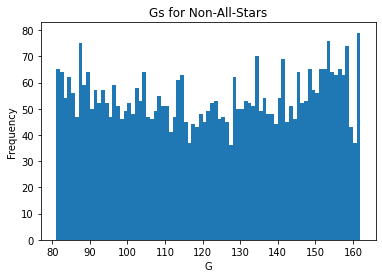

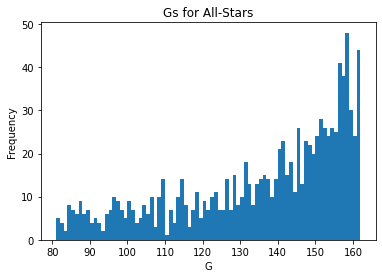

In [ ]:
def get_feature_distribution(data_df, label_df, column, bins, range):
  not_allstar_dist = data_df[column]
  allstar_dist = label_df[column]
  plt.hist(not_allstar_dist, bins=bins, range=range)
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.title(column + "s for Non-All-Stars")
  plt.show()

  plt.hist(allstar_dist, bins=bins, range=range)
  plt.xlabel(column)
  plt.ylabel("Frequency")
  plt.title(column + "s for All-Stars")
  plt.show()
get_feature_distribution(batting_data_2000, allstar_batt, "G", 81, [81,162])
  

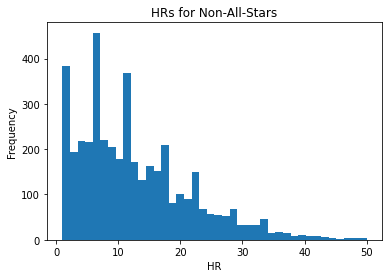

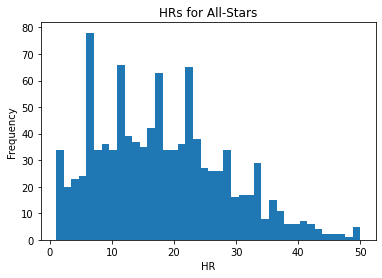

In [ ]:
get_feature_distribution(batting_data_2000, allstar_batt,"HR", 40, [1, 50])

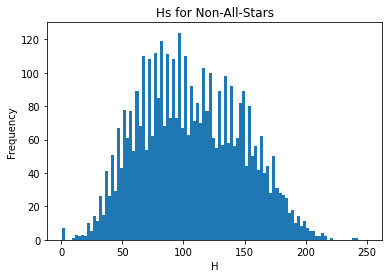

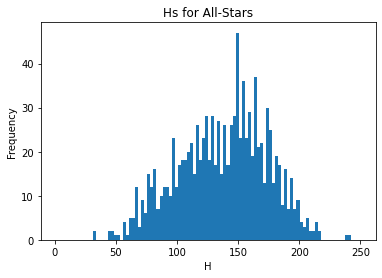

In [ ]:
get_feature_distribution(batting_data_2000, allstar_batt, "H", 100, [1, 250])

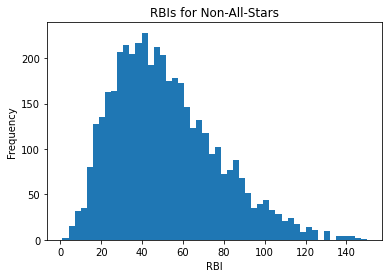

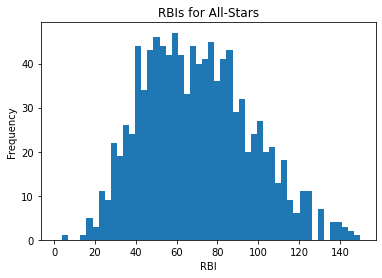

In [ ]:
get_feature_distribution(batting_data_2000, allstar_batt, "RBI", 50, [1,150])

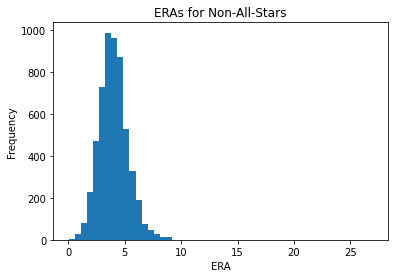

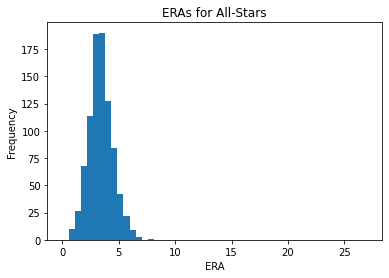

In [ ]:
get_feature_distribution(pitching_data_2000, allstar_pitch, "ERA", 50, [.01, 27])

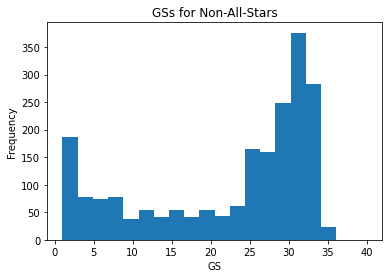

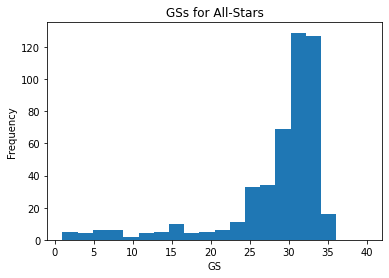

In [ ]:
get_feature_distribution(pitching_data_2000, allstar_pitch, "GS", 20, [1, 40])

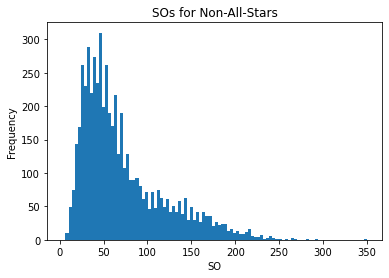

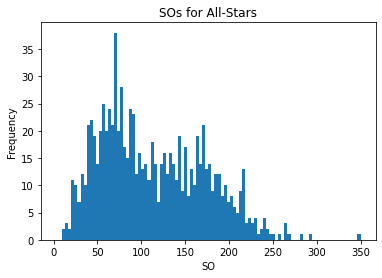

In [ ]:
get_feature_distribution(pitching_data_2000, allstar_pitch, "SO", 100, [3, 350])

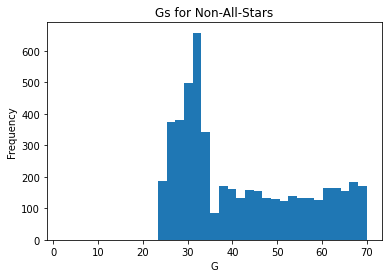

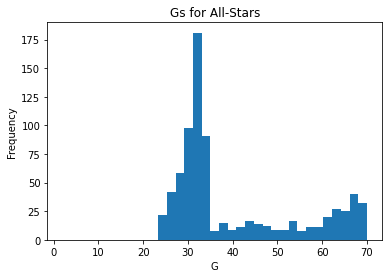

In [ ]:
get_feature_distribution(pitching_data_2000, allstar_pitch, "G", 35, [2, 70])

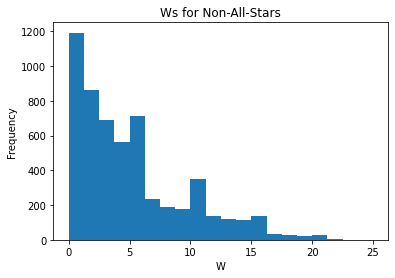

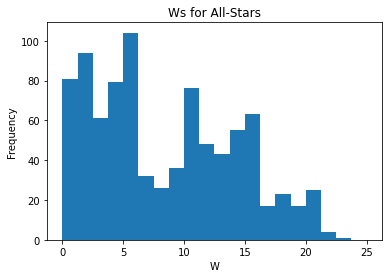

In [ ]:
get_feature_distribution(pitching_data_2000, allstar_pitch, "W", 20, [0, 25])

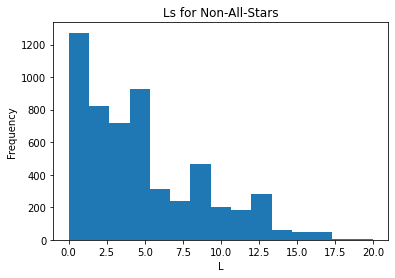

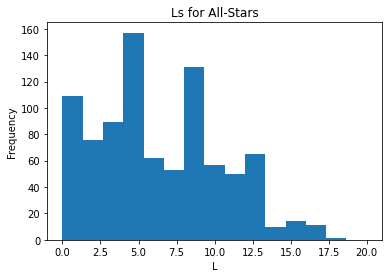

In [ ]:
get_feature_distribution(pitching_data_2000, allstar_pitch, "L", 15, [0, 20])

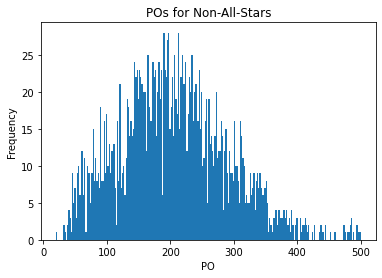

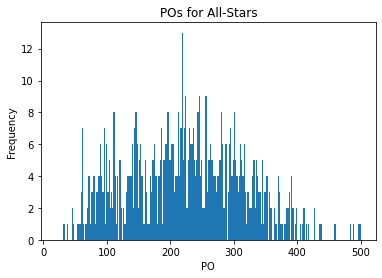

In [ ]:
get_feature_distribution(fielding_data_2000, allstar_field, "PO", 250, [20, 500])

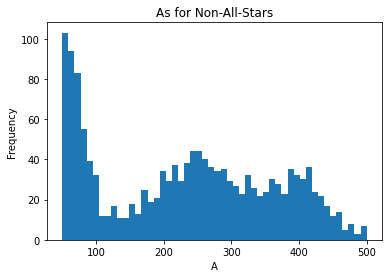

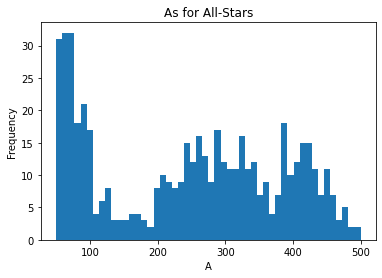

In [ ]:
get_feature_distribution(fielding_data_2000, allstar_field, "A", 50, [50, 500])

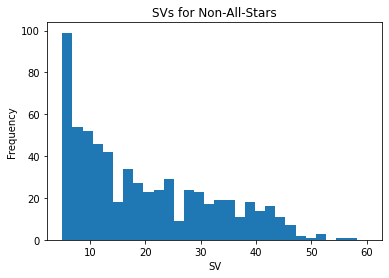

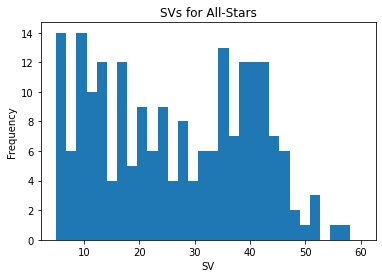

In [ ]:
get_feature_distribution(pitching_data_2000, allstar_pitch, "SV", 30, [5, 60])

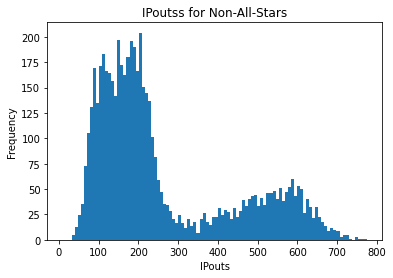

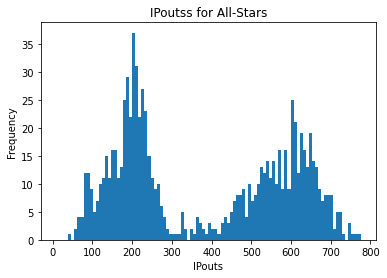

In [ ]:
get_feature_distribution(pitching_data_2000, allstar_pitch, "IPouts", 100, [9, 775])

In [ ]:
# pitching_data_columns = ["W", "L", "G", "GS", "SO", "CG", "SHO", "SV", "IPouts", "H", "ER", "HR", "BB", "BAOpp", "ERA", "IBB", "WP", "BK", "BFP", "GF", "R", "SH", "SF", "GIDP", "weight", "height"]
pitching_plot_bins = [(1, 25), (1, 15), (5, 70), (1, 35), (5, 400), (1, 15), (1, 15), (5, 50), (9, 775), (5, 250), (1, 200), (1, 100), (1, 200), (.10, .9), (.1, 10), (1, 50), (1, 50), (1, 10), (1, 1000), (1, 100), (1, 200), (1, 100), (1,100), (1, 100), (100, 400), (65, 82)]
col_bin_mapping = dict(zip(pitching_data_columns, pitching_plot_bins))
for cols in pitching_data_columns:
  get_feature_distribution(pitching_data_2000, allstar_pitch, cols, 50, col_bin_mapping[cols])


In [ ]:
batt_data_columns = ["G", "AB", "H", "2B", "3B", "HR", "RBI", "SB", "CS", "SO", "IBB", "HBP", "SH", "SF", "GIDP", "weight", "height"]
batting_plot_bins = [(50, 162), (100,700), (10, 250), (1, 60), (1, 25), (1, 60), (5, 150), (1, 60), (1, 30), (5, 250), (1, 20), (1, 20), (1, 30), (1, 30), (1, 75), (150, 350), (64, 83)]
col_bin_mappings = dict(zip(batt_data_columns, batting_plot_bins))
for cols in batt_data_columns:
  get_feature_distribution(batting_data_2000, allstar_batt, cols, 50, col_bin_mappings[cols])


In [ ]:
fielding_data_columns = ["G", "GS", "InnOuts", "PO", "A", "E", "DP"]
fielding_plot_bins = [(20, 163), (20, 163), (200, 4350), (10, 500), (10, 500), (0, 50), (0, 100), (140, 340), (64, 83)]
col_bin_mappings = dict(zip(fielding_data_columns, fielding_plot_bins))
for cols in fielding_data_columns:
  get_feature_distribution(fielding_data_2000, allstar_field, cols, 50, col_bin_mappings[cols])

In [ ]:
print(log_reg_feature_coefficients[1].to_numpy().astype(np.float))

In [ ]:
plt.barh(y = log_reg_feature_coefficients[0].tolist(), width = log_reg_feature_coefficients[1].to_numpy().astype(np.float))
plt.title("Model Weights of Batting Features")
plt.xlabel("Weights")
plt.ylabel("Batting Features")
plt.savefig(path_to_ssi + "batting_feature_weights Bar Chart.png")


In [ ]:
adv_batt_coefs = adv_batt_model_lr.coef_
adv_batt_coefs = adv_batt_coefs.reshape(16,1)

adv_batt_features = np.array(adv_batt_data_columns).reshape((16, 1))
adv_batt_feat_coefs = np.hstack((adv_batt_features, adv_batt_coefs))
adv_batt_feat_coefs = pd.DataFrame(adv_batt_feat_coefs)
adv_batt_log_reg_feature_coefficients = adv_batt_feat_coefs.sort_values(by=1, ascending=True)
adv_batt_log_reg_feature_coefficients.to_csv(path_to_ssi + "Log_Reg_Feature_Coefficients.csv")
adv_batt_log_reg_feature_coefficients


In [ ]:
plt.barh(y=adv_batt_log_reg_feature_coefficients[0].tolist(), width=adv_batt_log_reg_feature_coefficients[1].to_numpy().astype(np.float))
plt.title("Batting Feature Weights with Percentage Features Added")
plt.xlabel("Weights")
plt.ylabel("Feature")
plt.savefig(path_to_ssi + "ADV_batt_feature_Weights.png")
plt.show()

In [ ]:
adv_pitching_data_columns = pitching_data_columns +['WHIP']
adv_pitching_data_cols = pitching_data_2000[adv_pitching_data_columns]

In [ ]:
adv_pitch_x_train, adv_pitch_x_test, adv_pitch_y_train, adv_pitch_y_test = train_test_split(adv_pitching_data_cols, y_pitching, test_size = 0.2)

In [ ]:
adv_pitch_x_train = standardizer.fit_transform(adv_pitch_x_train)
adv_pitch_x_test = standardizer.fit_transform(adv_pitch_x_test)

In [ ]:
adv_pitch_model = LogisticRegression(solver='liblinear', C=1).fit(adv_pitch_x_train, adv_pitch_y_train)

adv_y_pitch_train_predict = adv_pitch_model.predict(adv_pitch_x_train)
adv_acc_pitch_train = sklearn.metrics.accuracy_score(adv_pitch_y_train, adv_y_pitch_train_predict)

adv_pitch_predict_proba_train = adv_pitch_model.predict_proba(adv_pitch_x_train)
adv_pitch_probs_train = adv_pitch_predict_proba_train[:, 1]
adv_auc_pitch_train = sklearn.metrics.roc_auc_score(adv_pitch_y_train, adv_pitch_probs_train)
print(adv_acc_pitch_train, adv_auc_pitch_train)

adv_y_pitch_test_predict = adv_pitch_model.predict(adv_pitch_x_test)
adv_acc_pitch_test = sklearn.metrics.accuracy_score(adv_pitch_y_test, adv_y_pitch_test_predict)

adv_pitch_predict_proba_test =  adv_pitch_model.predict_proba(adv_pitch_x_test)
adv_pitch_probs_test = adv_pitch_predict_proba_test[:, 1]
adv_auc_pitch_test = sklearn.metrics.roc_auc_score(adv_pitch_y_test, adv_pitch_probs_test)
print(adv_acc_pitch_test, adv_auc_pitch_test)

In [ ]:
adv_pitch_f1 = sklearn.metrics.f1_score(adv_pitch_y_train, adv_y_pitch_train_predict)
print(adv_pitch_f1)

adv_pitch_f1_test = sklearn.metrics.f1_score(adv_pitch_y_test, adv_y_pitch_test_predict)
print(adv_pitch_f1_test)

In [ ]:
print(pitching_data_2000['WHIP'].isnull().sum().sum())

In [ ]:
pitch_coefs = pitch_model_log_reg.coef_
pitch_coefs = pitch_coefs.reshape(17,1)

pitch_features = np.array(pitching_data_columns).reshape((17, 1))
pitch_feat_coefs = np.hstack((pitch_features, pitch_coefs))
pitch_feat_coefs = pd.DataFrame(pitch_feat_coefs)
pitch_log_reg_feature_coefficients = pitch_feat_coefs.sort_values(by=1, ascending=False)
# pitch_log_reg_feature_coefficients.to_csv(path_to_ssi + "Log_Reg_Feature_Coefficients.csv")
pitch_log_reg_feature_coefficients


In [ ]:
plt.barh(y=pitch_log_reg_feature_coefficients[0].tolist(), width=pitch_log_reg_feature_coefficients[1].to_numpy().astype(np.float))
plt.title("Pitching Feature Weights")
plt.xlabel("Weights")
plt.ylabel("Feature")
plt.savefig(path_to_ssi + "Pitching_feature_Weights.png")
plt.show()

In [ ]:
adv_pitch_coefs = adv_pitch_model.coef_
adv_pitch_coefs = adv_pitch_coefs.reshape(18,1)

adv_pitch_features = np.array(adv_pitching_data_columns).reshape((18, 1))
adv_pitch_feat_coefs = np.hstack((adv_pitch_features, adv_pitch_coefs))
adv_pitch_feat_coefs = pd.DataFrame(adv_pitch_feat_coefs)
adv_pitch_log_reg_feature_coefficients = adv_pitch_feat_coefs.sort_values(by=1, ascending=False)
# pitch_log_reg_feature_coefficients.to_csv(path_to_ssi + "Log_Reg_Feature_Coefficients.csv")
adv_pitch_log_reg_feature_coefficients

In [ ]:
plt.barh(y=adv_pitch_log_reg_feature_coefficients[0].tolist(), width=adv_pitch_log_reg_feature_coefficients[1].to_numpy().astype(np.float))
plt.title("Advanced Pitching Feature Weights")
plt.xlabel("Weights")
plt.ylabel("Feature")
plt.savefig(path_to_ssi + "ADV_Pitching_feature_Weights.png")

In [ ]:
field_coefs = field_model.coef_
field_coefs = field_coefs.reshape(7,1)

field_features = np.array(fielding_data_columns).reshape((7, 1))
field_feat_coefs = np.hstack((field_features, field_coefs))
field_feat_coefs = pd.DataFrame(field_feat_coefs)
field_log_reg_feature_coefficients = field_feat_coefs.sort_values(by=1, ascending=False)
field_log_reg_feature_coefficients.to_csv(path_to_ssi + "Field_Log_Reg_Feature_Coefficients.csv")
field_log_reg_feature_coefficients

In [ ]:
plt.barh(y=field_log_reg_feature_coefficients[0].tolist(), width=field_log_reg_feature_coefficients[1].to_numpy().astype(np.float))
plt.title('Fielding Feature Weights')
plt.ylabel('Feature')
plt.xlabel('Weight')
plt.savefig(path_to_ssi + 'field_feature_weights.png')
plt.show()

In [ ]:
import sklearn.metrics as metrics

def roc_curve_pipeline(X_test, y_test, model):
  probs = model.predict_proba(X_test)
  preds = probs[:,1]
  fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
  roc_auc = metrics.auc(fpr, tpr)

  # method I: plt
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

# # method II: ggplot
# from ggplot import *
# df = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
# ggplot(df, aes(x = 'fpr', y = 'tpr')) + geom_line() + geom_abline(linetype = 'dashed')

# batt_roc_curve = roc_curve_pipeline(x_batting_test, y_batting_test, batt_model_log_reg)
# all_batt_roc_curve = roc_curve_pipeline(x_batting_test, y_batting_test, batt_model_log_reg)
adv_pitch_roc = roc_curve_pipeline(adv_pitch_x_test, adv_pitch_y_test, adv_pitch_model)

In [ ]:
roc_curve_pipeline(x_pitch_test, y_pitch_test, pitch_model_log_reg)

In [ ]:
x_field_train, x_field_test, y_field_train, y_field_test = train_test_split(fielding_data_cols, y_fielding)

In [ ]:
x_field_train = standardizer.fit_transform(x_field_train)
x_field_test = standardizer.fit_transform(x_field_test)

In [ ]:
field_model = LogisticRegression(solver='liblinear', C=1, penalty='l2').fit(x_field_train, y_field_train)

y_field_predict_train = field_model.predict(x_field_train)
y_field_predict_proba_train = field_model.predict_proba(x_field_train)
field_probs_train = y_field_predict_proba_train[:, 1]
acc_field_train = sklearn.metrics.accuracy_score(y_field_train, y_field_predict_train)

auc_field_train = sklearn.metrics.roc_auc_score(y_field_train, field_probs_train)
print(acc_field_train, auc_field_train)

y_field_predict_test = field_model.predict(x_field_test)
acc_field_test = sklearn.metrics.accuracy_score(y_field_test, y_field_predict_test)

y_field_predict_proba_test = field_model.predict_proba(x_field_test)
field_probs_test = y_field_predict_proba_test[:, 1]
auc_field_test = sklearn.metrics.roc_auc_score(y_field_test, field_probs_test)
print(acc_field_test, auc_field_test)

In [ ]:
roc_curve_pipeline(x_field_test, y_field_test, field_model)

In [ ]:
roc_curve_pipeline(x_field_test, y_field_test, field_model)

In [ ]:
roc_curve_pipeline(adv_batt_x_test, adv_batt_y_test, adv_batt_model_lr)

In [ ]:
roc_curve_pipeline(adv_pitch_x_test, adv_pitch_y_test, adv_pitch_model_log_reg)

## Confidence Intervals

In [ ]:
def confidence_interval(x_data, y_data, X_data, Y_data, model):
  ci_values = []
  for i in range(100):
    train_test_split(x_data, y_data, test_size=0.2)
    ci = acc_auc_train_test_pipeline(X_data, Y_data, model)
    ci_values.append(ci)
    ci_values = sorted(ci_values)
  print(ci_values)
  return

In [ ]:
ci_values = []
for i in range(100):
  train_test_split(all_batt_cols, y_batting, test_size=0.2)
  ci = acc_auc_train_test_pipeline(x_batting_test, y_batting_test, batt_model_log_reg)
  ci_values.append(ci)


In [ ]:
confidence_interval(all_batt_cols, y_batting, x_batting_test, y_batting_test, batt_model_log_reg)

In [ ]:
confidence_interval(pitching_data_cols, y_pitching, x_pitch_test, y_pitch_test, pitch_model_log_reg)

In [ ]:
confidence_interval(fielding_data_cols, y_fielding, x_field_test, y_field_test, field_model)

In [ ]:
sorted_batt_ci = sorted(ci.values)
print(sorted_batt_ci)